Ονοματεπώνυμο: Ζαμάγιας Μιχαήλ Ανάργυρος

ΑΜ: ΤΠ5000

## Import modules

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, tree, metrics

# Data pre-processing

## Read datasets

In [2]:
datasets = ['LungTrain.txt', 'LungTest.txt', 'KEGG_DATA.txt']
training_dataset, testing_dataset, kegg_dataset = [
    pd.read_csv(dataset, sep='\t')
    for dataset in datasets
]

In [3]:
def process_data(dataset: pd.DataFrame) -> [np.array, np.array, np.array]:
    """To process read datasets.
    "Cleared" up column names are stored in the list dataset_labels.
    Firstly, this function returns gene names as a pd.Series type, indexed.
    Secondly, it returns label names as a pd.Series type, indexed.
    Thirdly, it returns the dataset altered in the following ways:
        -   Its columns are renamed by the dataset_labels list.
        -   It gets transposed.
    Args:
        dataset(pd.DataFrame): Read dataset.
    Returns:
        Tuple[np.array, np.array, np.array]: Returns a tuple containing dataset genes, dataset labels and processed
            dataset as np.arrays.
    """
    dataset_genes = dataset.iloc[:, 0]
    dataset_labels = pd.Series(
        [
            'Cancer' if 'Cancer' in dataset_column else 'Normal' if 'Normal' in dataset_column else dataset_column
            for dataset_column in list(dataset.columns)
        ]
    )
    altered_dataset = dataset.set_axis(dataset_labels, axis='columns').T.iloc[1:]
    return [np.array(dataset_genes), np.array(dataset_labels[1:]), np.array(altered_dataset)]


In [4]:
training_genes, train_labels, train_features = process_data(training_dataset)
testing_genes, test_labels, test_features = process_data(testing_dataset)

# Data analysis

## Support Vector Machines model

### Train the SVM model with training dataset.

In [5]:
svm_model = svm.SVC().fit(train_features, train_labels)

### Run trained SVM model on testing dataset and calculate its prediction, confusion matrix and accuracy.

In [6]:
svm_prediction = svm_model.predict(test_features)
svm_confusion_matrix = metrics.confusion_matrix(test_labels, svm_prediction)
svm_accuracy = svm_model.score(test_features, test_labels)

### Print its prediction, confusion matrix and accuracy.

In [7]:
print(svm_prediction)
print(svm_confusion_matrix)
print(svm_accuracy)

['Normal' 'Normal' 'Cancer' 'Cancer' 'Normal' 'Cancer' 'Normal' 'Cancer'
 'Normal' 'Normal' 'Normal' 'Normal' 'Cancer' 'Normal' 'Cancer' 'Normal'
 'Cancer' 'Normal' 'Cancer' 'Cancer' 'Cancer' 'Cancer' 'Cancer' 'Normal'
 'Cancer' 'Normal' 'Cancer' 'Cancer' 'Normal' 'Normal']
[[14  0]
 [ 1 15]]
0.9666666666666667


## Decision tree model

### Train decision tree model with training dataset.

In [8]:
tree_model = tree.DecisionTreeClassifier().fit(train_features, train_labels)
decision_tree_accuracy = tree_model.score(test_features, test_labels)

### Print its accuracy and tree plot.

0.9333333333333333


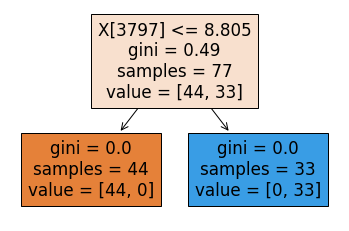

In [9]:
print(decision_tree_accuracy)
decision_tree_plot = tree.plot_tree(tree_model, filled=True)
# print(decision_tree_plot)

### Run trained tree model on testing dataset, calculate its prediction and print its confusion matrix.

In [10]:
decision_tree_prediction = tree_model.predict(test_features)
decision_tree_confusion_matrix = metrics.confusion_matrix(test_labels, decision_tree_prediction)
print(decision_tree_confusion_matrix)

[[14  0]
 [ 2 14]]


### Comment on SVM and Decision tree models, and reason which one is more efficient, if there is any difference.

In [11]:
def calculate_model_delta(object_one: np.array, object_two: np.array) -> [str, float]:
    delta_ratio = np.mean(object_one != object_two)
    delta_percentage = delta_ratio * 100
    return ['Yes' if delta_ratio else 'No', delta_percentage]

In [12]:
accuracy_delta_bool, accuracy_delta_percentage = calculate_model_delta(svm_accuracy, decision_tree_accuracy)
prediction_delta_bool, prediction_delta_percentage = calculate_model_delta(svm_prediction, decision_tree_prediction)
confusion_matrix_delta_bool, percentage_delta_confusion_matrix = calculate_model_delta(svm_confusion_matrix,
                                                                                       decision_tree_confusion_matrix)

#### Comparison between SVM accuracy and Decision tree accuracy.

In [13]:
print(f'Is there any difference in accuracy between models?\n{accuracy_delta_bool}, ', end='')
print(f'there is a {accuracy_delta_percentage}% difference in accuracy between models.')

Is there any difference in accuracy between models?
Yes, there is a 100.0% difference in accuracy between models.


#### Comparison between test labels, SVM prediction and Decision tree prediction.

##### Comparison between SVM prediction and Decision tree prediction.

In [14]:
print(f'Is there any difference in prediction between models?\n{prediction_delta_bool}, ', end='')
print(f'there is a {prediction_delta_percentage}% difference in prediction between models.')

Is there any difference in prediction between models?
Yes, there is a 3.3333333333333335% difference in prediction between models.


##### Comparison between test labels and SVM prediction.

In [15]:
_, percentage_delta_test_svm = calculate_model_delta(test_labels, svm_prediction)
print(f'Difference percentage between test labels and SVM prediction: {percentage_delta_test_svm}%')

Difference percentage between test labels and SVM prediction: 3.3333333333333335%


##### Comparison between test labels and Decision tree prediction.

In [16]:
_, percentage_delta_test_decision_tree = calculate_model_delta(test_labels, decision_tree_prediction)
print(f'Difference percentage between test labels and SVM prediction: {percentage_delta_test_decision_tree}%')

Difference percentage between test labels and SVM prediction: 6.666666666666667%


#### Comparison between test label, SVM and Decision tree confusion matrices.

##### Comparison between SVM and Decision tree confusion matrices.

In [17]:
print(f'Is there any difference in confusion matrix between models?\n{confusion_matrix_delta_bool}, ', end='')
print(f'there is a {percentage_delta_confusion_matrix}% difference in confusion matrix between models.')

Is there any difference in confusion matrix between models?
Yes, there is a 50.0% difference in confusion matrix between models.


## Gene selection